## Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.790.jpg
/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.6281.jpg
/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.3593.jpg
/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.9761.jpg
/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.6200.jpg
/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.4253.jpg
/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.2314.jpg
/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.10981.jpg
/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.130.jpg
/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs/dog.6798.jpg
/

#### Importing the images from directories and converting them into arrays and then converting them into vectors. 

In [2]:
from PIL import Image
import os


def image_to_vector(image_path):
    # Opening image using Pillow
    img = Image.open(image_path)
    
    ## resizing the image to reduce dimensions
    img=img.resize((100,100))
    
    # Converting the image to a numpy array
    img_array = np.array(img)
    
    # Flattening the image array to a 1D vector
    img_vector = img_array.flatten()
    
    return img_vector

def images_in_folder_to_vectors(folder_path, label):
    # Initializing empty lists to store vectors and labels
    vectors = []
    labels = []
    
    # Iterating through all files in the folder
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        
        # Checking if the file is an image
        if img_path.endswith(('.jpg', '.jpeg', '.png', '.gif')):
            # Converting image to vector
            img_vector = image_to_vector(img_path)
            
            # Appending the vector and label to the lists
            vectors.append(img_vector)
            labels.append(label)
    
    return vectors, labels

# Specifying the path to the 'cat' folder
train_cat_folder_path = "/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/train/cats"
train_dog_folder_path="/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/train/dogs"
test_cat_folder_path = '/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid/cats'
test_dog_folder_path="/kaggle/input/cats-vs-dogs-1000/dogs_cats_sample_1000/dogs_cats_sample_1000/valid/dogs"

#here we are going to put cat=1 and dog=0

# Converting images in the 'cat' folder to vectors with the label 'cat'
train_cat,train_cat_label = images_in_folder_to_vectors(train_cat_folder_path, label=1)
train_dog,train_dog_label = images_in_folder_to_vectors(train_dog_folder_path, label=0)
test_cat,test_cat_label = images_in_folder_to_vectors(test_cat_folder_path, label=1)
test_dog,test_dog_label = images_in_folder_to_vectors(test_dog_folder_path, label=0)

# Now, cat_vectors contains the feature vectors, and cat_labels contains the corresponding labels (1)


In [7]:
## displaying the number of vectors or data pointsin each variable
print(len(train_cat))
print(len(train_cat_label))
print(len(train_dog))
print(len(train_dog_label))
print(len(test_cat))
print(len(test_cat_label))
print(len(test_dog))
print(len(test_dog_label))

1000
1000
1000
1000
1002
1002
998
998


#### Converting the vectors into proper dataframe 

In [8]:
x_cat=pd.DataFrame(train_cat)
y_cat=pd.DataFrame(train_cat_label)
x_dog=pd.DataFrame(train_dog)
y_dog=pd.DataFrame(train_dog_label)

In [9]:
x_cat_test=pd.DataFrame(test_cat)
y_cat_test=pd.DataFrame(test_cat_label)
x_dog_test=pd.DataFrame(test_dog)
y_dog_test=pd.DataFrame(test_dog_label)

#### Concatenating both the categories of cat and dog dataframe 

In [10]:
x_train=pd.concat([x_cat,x_dog],ignore_index=True)
y_train=pd.concat([y_cat,y_dog],ignore_index=True)
x_test=pd.concat([x_cat_test,x_dog_test],ignore_index=True)
y_test=pd.concat([y_cat_test,y_dog_test],ignore_index=True)


In [11]:
train=pd.concat([x_train,y_train],axis=1,ignore_index=True)
test=pd.concat([x_test,y_test],axis=1,ignore_index=True)




In [12]:
print(train.shape,test.shape)

(2000, 30001) (2000, 30001)


#### doing random sampling to shuffle the data set 

In [13]:
train=train.sample(n=2000,random_state=40,ignore_index=True)
test=test.sample(n=2000,random_state=40,ignore_index=True) 


In [14]:
print(train.shape) 
print(test.shape) 

(2000, 30001)
(2000, 30001)


In [15]:
###separating x_train,x_test,y_train,y_test
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1:]
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1:]

In [16]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2000, 30000) (2000, 1)
(2000, 30000) (2000, 1)


#### Creating a support vector classifier model 

In [17]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

#### predicting and evaluating the model 

In [18]:
predicted=model.predict(x_test)

accuracy : 0.641


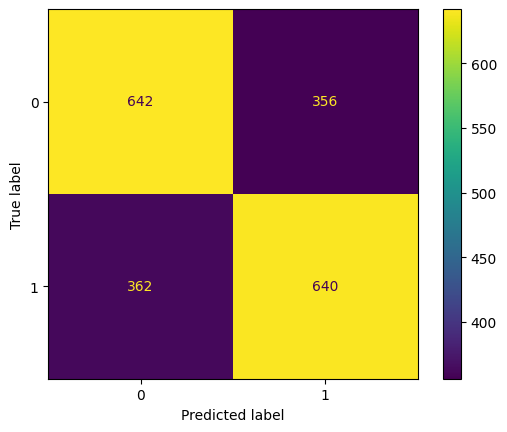

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
accuracy=accuracy_score(y_test,predicted) 

cm = confusion_matrix(y_test, predicted, labels=model.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
print("accuracy :",accuracy)
disp.plot()
plt.show()


#### The Model is showing 64.1% accuracy  where 642 cat images were correctly classified out of 1002 images and 640 dog images were correctly classified out of 998 